# 1. Process and Visualize Data

In [1]:
import numpy as np
import random
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
# Load and split data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print("Shape of training data: ", train_images.shape)
print("Shape of testing data: ", test_images.shape)

Shape of training data:  (60000, 28, 28)
Shape of testing data:  (10000, 28, 28)


In [4]:
train_images = train_images / 255.0
test_images = test_images/ 255.0

In [5]:
class_label = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
               5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Anke boot'}

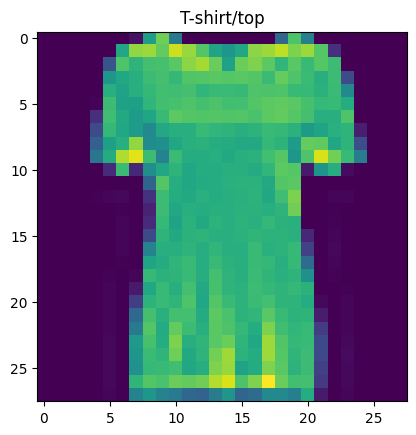

In [6]:
# Select a sample image and visualize
plt.imshow(train_images[10])
plt.title(class_label[train_labels[10]])
#plt.axis('off')
plt.show()

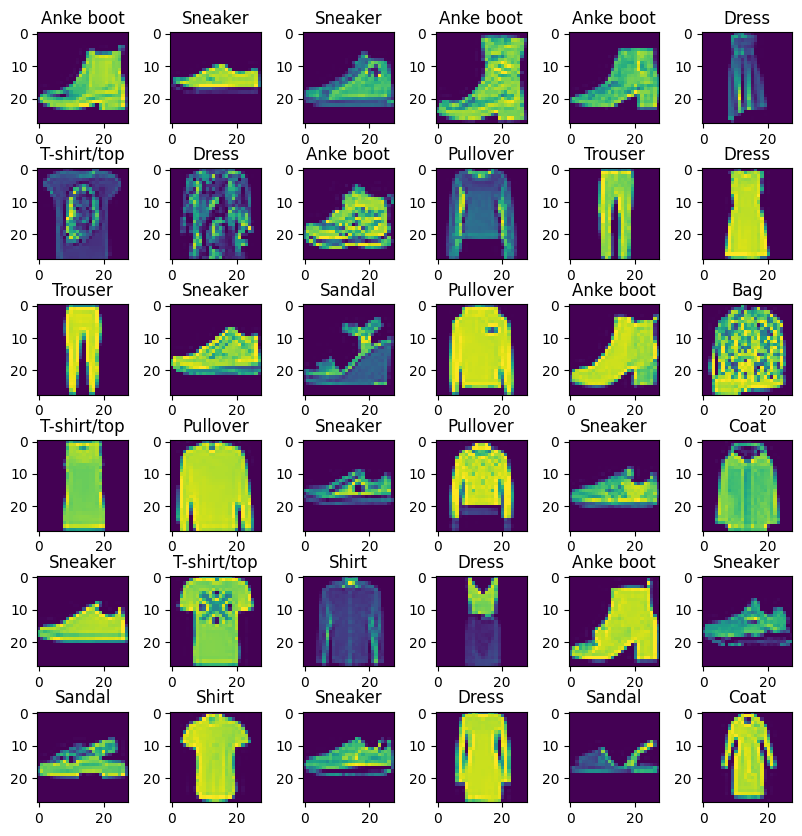

In [7]:
W_grid = 6
L_grid = 6

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10, 10))
axes = axes.ravel()

n_testing = test_images.shape[0]

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_testing) # pick a random number
    axes[i].imshow(test_images[index]) #,cmap='gray')
    axes[i].set_title(class_label[test_labels[index]])

plt.subplots_adjust(hspace = 0.5)

# Softmax Regression

In [8]:
# Preprocess the data
X_train = tf.reshape(train_images, (-1, 28 * 28))
X_test = tf.reshape(test_images, (-1, 28 * 28))
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)

In [9]:
# Define the model
softmax_model = keras.models.Sequential()
softmax_model.add(keras.layers.Dense(10, activation='softmax', input_shape=(28 * 28,)))

In [10]:
# Compile the model
softmax_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
softmax_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Train the model
history = softmax_model.fit(X_train, y_train, epochs=40, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/40
118/118 [==============================] - 7s 9ms/step - loss: 1.0163 - accuracy: 0.6815 - val_loss: 0.7205 - val_accuracy: 0.7601
Epoch 2/40
118/118 [==============================] - 1s 6ms/step - loss: 0.6446 - accuracy: 0.7902 - val_loss: 0.6197 - val_accuracy: 0.7888
Epoch 3/40
118/118 [==============================] - 1s 6ms/step - loss: 0.5704 - accuracy: 0.8126 - val_loss: 0.5687 - val_accuracy: 0.8104
Epoch 4/40
118/118 [==============================] - 1s 5ms/step - loss: 0.5311 - accuracy: 0.8236 - val_loss: 0.5450 - val_accuracy: 0.8149
Epoch 5/40
118/118 [==============================] - 1s 5ms/step - loss: 0.5060 - accuracy: 0.8325 - val_loss: 0.5236 - val_accuracy: 0.8249
Epoch 6/40
118/118 [==============================] - 1s 5ms/step - loss: 0.4889 - accuracy: 0.8373 - val_loss: 0.5131 - val_accuracy: 0.8244
Epoch 7/40
118/118 [==============================] - 1s 5ms/step - loss: 0.4753 - accuracy: 0.8407 - val_loss: 0.5021 - val_accuracy: 0.8282
Epoch 

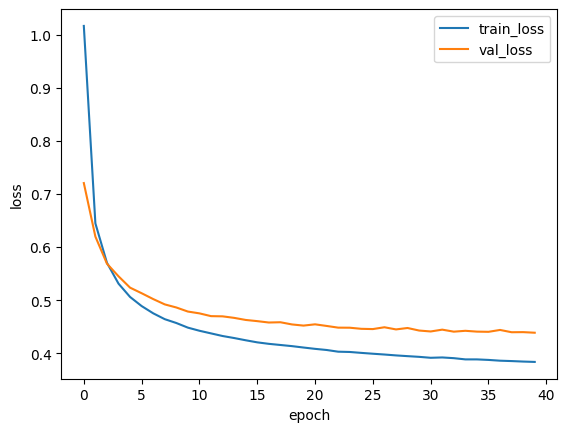

In [13]:
# train loss and validation loss visualization
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

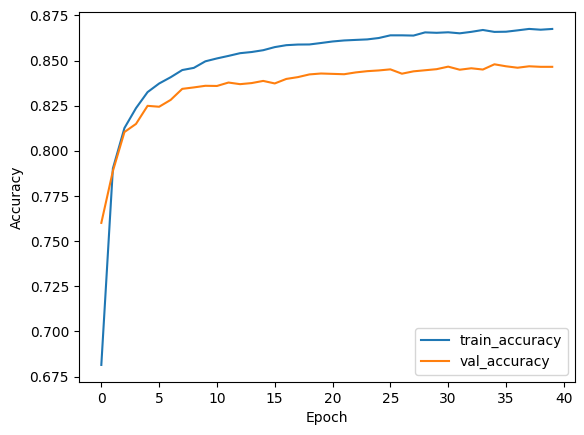

In [14]:
# Accuracy visualization
plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Multi Layer Perceptron (MLP)


In [15]:
# Preprocess the data
X_train = tf.reshape(train_images, (-1, 28 * 28))
X_test = tf.reshape(test_images, (-1, 28 * 28))
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)

In [16]:
# Define the model
MLP_model = keras.models.Sequential()
MLP_model.add(keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
MLP_model.add(keras.layers.Dense(256, activation='relu'))
MLP_model.add(keras.layers.BatchNormalization())
MLP_model.add(keras.layers.Dropout(0.2))
MLP_model.add(keras.layers.Dense(128, activation='relu'))
MLP_model.add(keras.layers.BatchNormalization())
MLP_model.add(keras.layers.Dropout(0.2))
MLP_model.add(keras.layers.Dense(64, activation='relu'))
MLP_model.add(keras.layers.BatchNormalization())
MLP_model.add(keras.layers.Dropout(0.2))
MLP_model.add(keras.layers.Dense(32, activation='relu'))
MLP_model.add(keras.layers.Dense(10, activation='softmax'))

In [17]:
# Compile the model
MLP_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
MLP_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                     

In [19]:
# Train the model
history = MLP_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/20
118/118 [==============================] - 6s 10ms/step - loss: 0.7678 - accuracy: 0.7492 - val_loss: 0.5604 - val_accuracy: 0.8194
Epoch 2/20
118/118 [==============================] - 1s 8ms/step - loss: 0.4325 - accuracy: 0.8498 - val_loss: 0.4885 - val_accuracy: 0.8255
Epoch 3/20
118/118 [==============================] - 1s 9ms/step - loss: 0.3834 - accuracy: 0.8626 - val_loss: 0.3961 - val_accuracy: 0.8553
Epoch 4/20
118/118 [==============================] - 1s 9ms/step - loss: 0.3543 - accuracy: 0.8712 - val_loss: 0.4951 - val_accuracy: 0.8295
Epoch 5/20
118/118 [==============================] - 1s 8ms/step - loss: 0.3355 - accuracy: 0.8787 - val_loss: 0.3791 - val_accuracy: 0.8592
Epoch 6/20
118/118 [==============================] - 1s 9ms/step - loss: 0.3155 - accuracy: 0.8836 - val_loss: 0.3992 - val_accuracy: 0.8595
Epoch 7/20
118/118 [==============================] - 1s 8ms/step - loss: 0.3084 - accuracy: 0.8876 - val_loss: 0.3598 - val_accuracy: 0.8657
Epoch

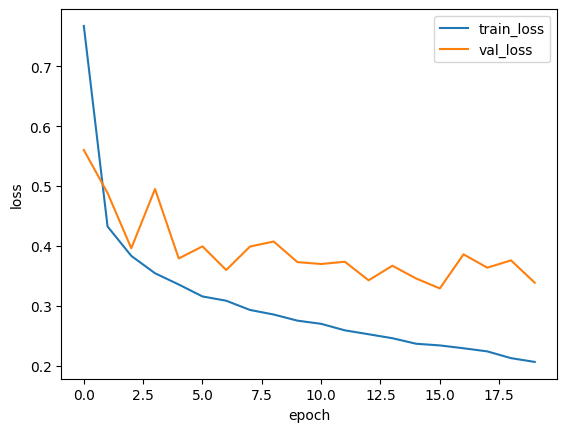

In [20]:
# train loss and validation loss visualization
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

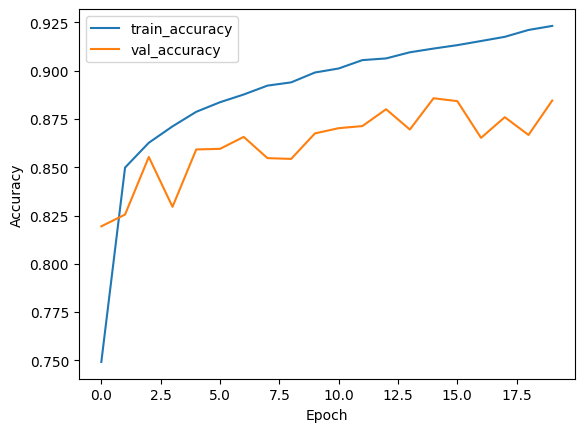

In [21]:
# Accuracy visualization
plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Convolutional Neural Network (CNN)

In [22]:
X_train = tf.reshape(train_images, (60000, 28,28,1))
X_test = tf.reshape(test_images, (10000, 28,28,1))
y_train = train_labels
y_test = test_labels

In [23]:
# Build model to train data
CNN_model = keras.models.Sequential()
CNN_model.add(tf.keras.Input(shape = (28,28,1)))
CNN_model.add(keras.layers.Conv2D(32,3,1, padding = 'same' ,activation = 'relu'))
CNN_model.add(keras.layers.BatchNormalization()) # y_bar = gamma*Xi + Beta
CNN_model.add(keras.layers.Dropout(0.3))
CNN_model.add(keras.layers.Conv2D(64,3,1, padding = 'same' ,activation = 'relu'))
CNN_model.add(keras.layers.BatchNormalization()) #
CNN_model.add(keras.layers.MaxPooling2D(2))
CNN_model.add(keras.layers.Dropout(0.2))
CNN_model.add(keras.layers.Conv2D(128,3,1, padding = 'same' ,activation = 'relu'))
CNN_model.add(keras.layers.BatchNormalization())

CNN_model.add(keras.layers.Conv2D(256,3,1, padding = 'same' ,activation = 'relu'))
CNN_model.add(keras.layers.BatchNormalization())
CNN_model.add(keras.layers.MaxPooling2D(2))
#CNN_model.add(keras.layers.Flatten())
CNN_model.add(keras.layers.GlobalAveragePooling2D())
CNN_model.add(keras.layers.Dense(128, activation = 'relu'))
CNN_model.add(keras.layers.Dense(10, activation = 'softmax'))

CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_3 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)       

In [24]:
CNN_model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])
history = CNN_model.fit(X_train, y_train,
                         validation_data = (X_test, y_test),
                         batch_size = 512, epochs = 30)

Epoch 1/30
118/118 [==============================] - 24s 117ms/step - loss: 0.6471 - accuracy: 0.7717 - val_loss: 6.3092 - val_accuracy: 0.1000
Epoch 2/30
118/118 [==============================] - 13s 107ms/step - loss: 0.3461 - accuracy: 0.8766 - val_loss: 14.9488 - val_accuracy: 0.1000
Epoch 3/30
118/118 [==============================] - 13s 107ms/step - loss: 0.2901 - accuracy: 0.8962 - val_loss: 11.5381 - val_accuracy: 0.1003
Epoch 4/30
118/118 [==============================] - 13s 108ms/step - loss: 0.2574 - accuracy: 0.9065 - val_loss: 7.0053 - val_accuracy: 0.1545
Epoch 5/30
118/118 [==============================] - 13s 108ms/step - loss: 0.2276 - accuracy: 0.9179 - val_loss: 2.0393 - val_accuracy: 0.4386
Epoch 6/30
118/118 [==============================] - 12s 105ms/step - loss: 0.2142 - accuracy: 0.9223 - val_loss: 1.1327 - val_accuracy: 0.6117
Epoch 7/30
118/118 [==============================] - 13s 107ms/step - loss: 0.1972 - accuracy: 0.9286 - val_loss: 0.3015 - val_

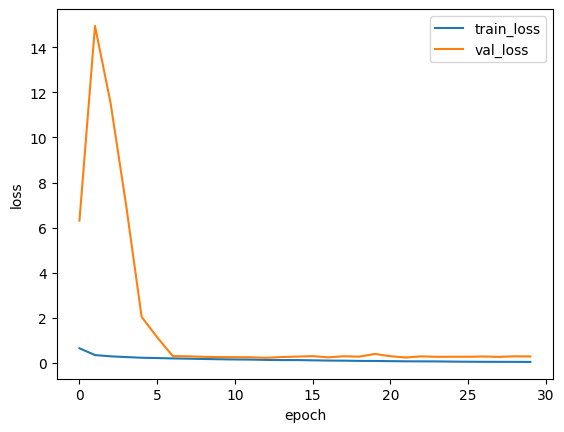

In [25]:
# train loss and validation loss visualization
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

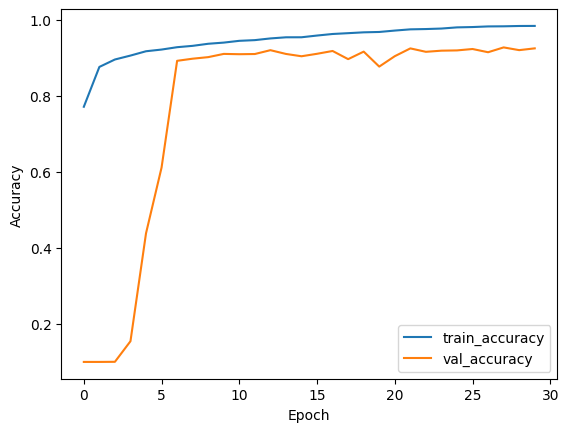

In [26]:
# Accuracy visualization
plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

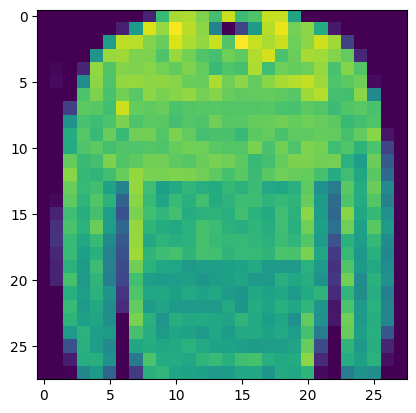

In [27]:
img = test_images[20]
plt.imshow(img);

In [28]:
img = tf.reshape(img, (1, 28, 28,  1))
predict = np.argmax(CNN_model.predict(img))
print(f'True Label: {test_labels[20]}')
print(f'Predict Label : {predict}')
print(f'Class: {class_label[predict]}')

1/1 [==============================] - 0s 232ms/step
True Label: 2
Predict Label : 2
Class: Pullover


In [29]:
predicted_classes = CNN_model.predict(X_test)
predicted_classes = np.argmax(predicted_classes , axis = 1)

313/313 [==============================] - 1s 3ms/step


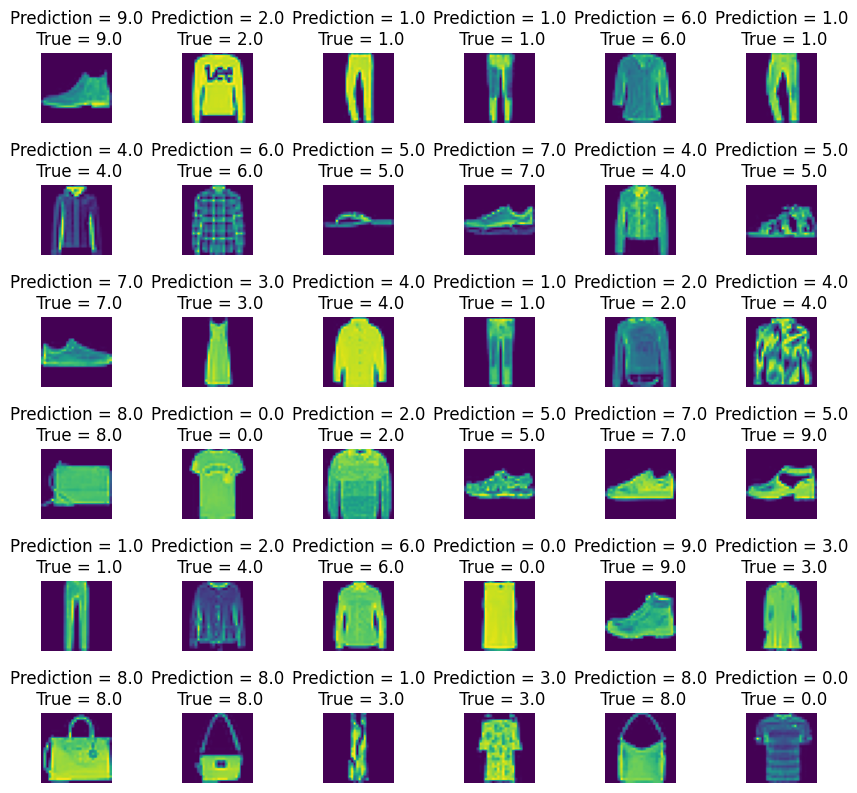

In [30]:
L = 6
W = 6
fig, axes = plt.subplots(L, W, figsize = (10,10))
axes = axes.ravel()
for i in np.arange(0, L * W):
    axes[i].imshow(test_images[i])
    axes[i].set_title("Prediction = {:0.1f}\n True = {:0.1f}".format(predicted_classes[i], test_labels[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

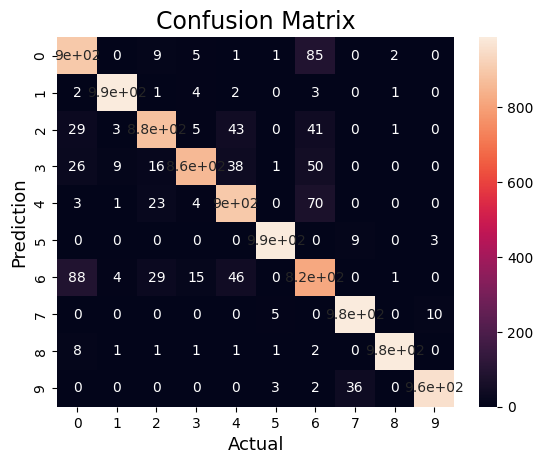

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels = [0, 1, 2,3,4,5,6,7,8,9]
cm = confusion_matrix(test_labels,predicted_classes, labels=labels)
sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [32]:
# Reference:
# https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&ab_channel=AndrejKarpathy
# https://viblo.asia/p/3-cap-do-hieu-ve-batch-normalization-bai-dich-johann-huber-Yym40mRmJ91